In [3]:
import os
import pandas as pd
import numpy as np
import glob
import pyarrow.feather as feather

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
scale = preprocessing.MinMaxScaler()
pd.set_option("display.max_rows", None)


def label_encoding(df, columns_list):
    for col in columns_list:
        df[col] = le.fit_transform(df[col])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        with open('Label_mapping_vpn.txt', 'a') as data:
            data.write(col+": "+str(le_name_mapping) + "\n")
    return df


def data_scale(df):
    df.loc[:, '0': '127'] = df.loc[:, '0': '127'] / 255.0
    df[['total_packet_lenght']] = scale.fit_transform(
        df[['total_packet_lenght']])
    return df


def remove_protocol(df, list_protocol):
    df = df.loc[~df['protocol'].isin(list_protocol)]
    return df


def remove_hello(df):
    df = df[~df['info'].str.contains('Hello|Handshake|Cert')]
    return df


def final_remove(df):
    df = df.drop(['ip_src', 'ip_dst',
                 'info', 'data'], axis=1)
    return df


# Chat

In [4]:
# get your working directory and target folder that contains all your files
path = os.path.join(
    os.getcwd(), '/home/onos/FL/Data Processing/rawds/vpn/Chat')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Chat = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Chat = pd.read_csv(file, engine='pyarrow')
    _df_Chat['Label'] = "Chat"
    file_name = file.split('/')
    _df_Chat['File_name'] = file_name[-1]
    df_Chat = pd.concat([df_Chat, _df_Chat])
del _df_Chat


In [5]:
remove_protocols = ['SSL', 'X11', 'XMPP/XML', 'OCSP', 'SSLv2','VNC','ICMP','SPOOLSS','SSLv3']

In [6]:
df_Chat = df_Chat.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [7]:
df_Chat.shape

(1467, 8)

In [8]:
df_Chat.to_csv(
    "vpn_csv/df_Chat.csv", index=False)
del df_Chat


# Email

In [9]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/vpn/Email')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Email = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Email = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_Email['Label'] = "Email"
    file_name = file.split('/')
    _df_Email['File_name'] = file_name[-1]
    df_Email = pd.concat([df_Email, _df_Email])
del _df_Email


/home/onos/FL/Data Processing/rawds/vpn/Email/vpn_email2a.csv


In [10]:
df_Email = df_Email.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [11]:
df_Email.shape

(929, 8)

In [12]:
df_Email.to_csv("vpn_csv/df_Email.csv", index=False)
del df_Email


# FileTransfer

In [13]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/vpn/FileTransfer')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_FileTransfer = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_FileTransfer = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_FileTransfer['Label'] = "FileTransfer"
    file_name = file.split('/')
    _df_FileTransfer['File_name'] = file_name[-1]
    df_FileTransfer = pd.concat([df_FileTransfer, _df_FileTransfer])
del _df_FileTransfer


/home/onos/FL/Data Processing/rawds/vpn/FileTransfer/vpn_sftp_A.csv
/home/onos/FL/Data Processing/rawds/vpn/FileTransfer/vpn_skype_files1a.csv
/home/onos/FL/Data Processing/rawds/vpn/FileTransfer/vpn_ftps_A.csv


In [14]:
df_FileTransfer.protocol.value_counts()

TCP        2023
UDP        1135
TLSv1.2     375
FTP         118
ICMP         68
GQUIC        63
SSHv2        54
SSLv3        49
TLSv1        35
SSH           6
Name: protocol, dtype: int64

In [15]:
df_FileTransfer = df_FileTransfer.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [16]:
df_FileTransfer.shape

(3630, 8)

In [17]:
df_FileTransfer.to_csv("vpn_csv/df_FileTranfer.csv", index=False)
del df_FileTransfer


# Streaming

In [18]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/vpn/Streaming')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Streaming = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Streaming = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_Streaming['Label'] = "Streaming"
    file_name = file.split('/')
    _df_Streaming['File_name'] = file_name[-1]
    df_Streaming = pd.concat([df_Streaming,_df_Streaming])
del _df_Streaming


/home/onos/FL/Data Processing/rawds/vpn/Streaming/vpn_youtube_A.csv
/home/onos/FL/Data Processing/rawds/vpn/Streaming/vpn_netflix_A.csv
/home/onos/FL/Data Processing/rawds/vpn/Streaming/vpn_vimeo_A.csv


In [19]:
df_Streaming = df_Streaming.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [20]:
df_Streaming.shape

(2563, 8)

In [21]:
df_Streaming.to_csv(
    "vpn_csv/df_Streaming.csv", index=False)
del df_Streaming


# VoIP

In [22]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/vpn/VoIP')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_VoIP = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_VoIP = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_VoIP['Label'] = "VoIP"
    file_name = file.split('/')
    _df_VoIP['File_name'] = file_name[-1]
    df_VoIP = pd.concat([df_VoIP,_df_VoIP])
del _df_VoIP


/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_facebook_audio2.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_skype_audio2.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_spotify_A.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_hangouts_audio2.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_voipbuster1a.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_hangouts_audio1.csv
/home/onos/FL/Data Processing/rawds/vpn/VoIP/vpn_skype_audio1.csv


In [23]:
df_VoIP.protocol.value_counts()

TLSv1.2     5238
UDP         1881
TCP         1471
TLSv1        505
GQUIC        210
SSL          198
STUN         196
HTTP          94
TLSv1.1       54
OCSP          53
ICMP          18
SSLv3          8
HTTP/XML       4
Name: protocol, dtype: int64

In [24]:
df_VoIP = df_VoIP.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [25]:
df_VoIP.shape

(8060, 8)

In [26]:
df_VoIP.to_csv(
    "vpn_csv/df_VoIP.csv", index=False)
del df_VoIP


# P2P

In [27]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/vpn/P2P')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_P2P = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_P2P = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_P2P['Label'] = "P2P"
    file_name = file.split('/')
    _df_P2P['File_name'] = file_name[-1]
    df_P2P = pd.concat([df_P2P,_df_P2P])
del _df_P2P


/home/onos/FL/Data Processing/rawds/vpn/P2P/vpn_bittorrent.csv


In [28]:
df_P2P.protocol.value_counts()

TCP         3567
UDP          371
HTTP         315
TLSv1.2       65
ICMP          13
SSLv3          8
HTTP/XML       1
Name: protocol, dtype: int64

In [29]:
df_P2P = df_P2P.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [30]:
df_P2P.shape

(4270, 8)

In [31]:
df_P2P.to_csv(
    "vpn_csv/df_P2P.csv", index=False)
del df_P2P


# Final

In [32]:
path = os.path.join(os.getcwd(),  '/home/onos/FL/Data Processing/vpn_csv')
all_files = glob.glob(os.path.join(path, "*.csv"))
df_vpn = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [33]:
import matplotlib.pyplot as plt


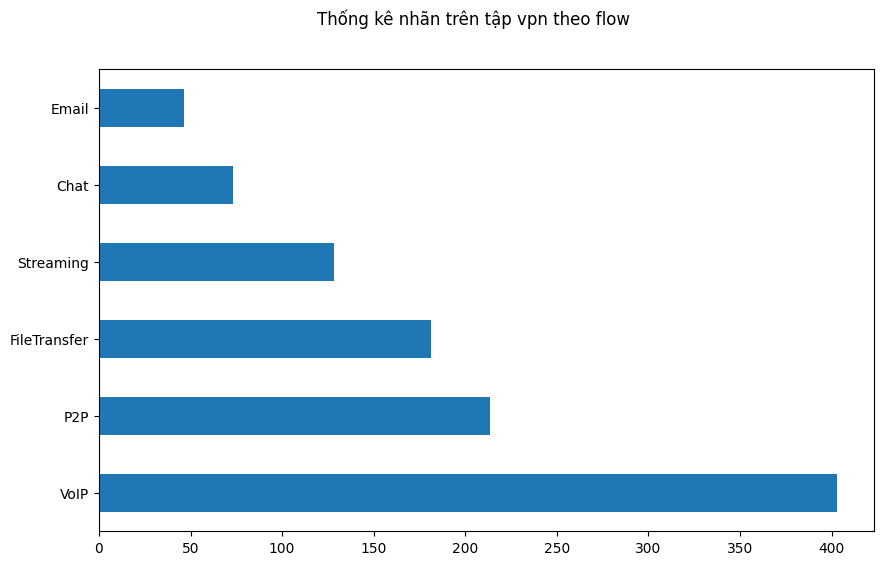

In [34]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Thống kê nhãn trên tập vpn theo flow")
(df_vpn.Label.value_counts()/20).plot(kind="barh")
plt.savefig('image/vpn_label_flow.png')


In [36]:
(df_vpn.Label.value_counts()/20).round(0)

VoIP            403.0
P2P             214.0
FileTransfer    182.0
Streaming       128.0
Chat             73.0
Email            46.0
Name: Label, dtype: float64

In [224]:
df_vpn.columns

Index(['time_epoch', 'frame_number', 'stream_id', 'ip_proto', 'protocol',
       'length', '0', '1', '2', '3',
       ...
       '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', 'Label',
       'File_name'],
      dtype='object', length=1468)

In [225]:
df_vpn = df_vpn.pipe(label_encoding,['protocol', 'Label'])

In [226]:
from sklearn.model_selection import train_test_split

train, test_case = train_test_split(df_vpn, test_size=0.2)

train = train.drop(['time_epoch', 'frame_number', 'File_name'],axis=1)
train, test = train_test_split(train, test_size=0.2)
train = train.drop(['stream_id'],axis=1)
train.to_csv("vpn_data.csv", index=False)
test.to_csv("vpn_test.csv", index=False)

In [227]:
test_case = test_case[['time_epoch', 'frame_number', 'stream_id', 'length', 'Label', 'File_name']]
split = 5
total_data_count = test_case.shape[0]
data_per_set = int(np.floor(total_data_count/split))
DataFrameDict = {}
for i in range(1, split+1):
    client_name = "client_" + str(i)
    start = data_per_set * (i-1)
    end = data_per_set * i

    print(f"Adding data from {start} to {end} for client : {client_name}")
    DataFrameDict[client_name] = test_case[start:end]
for df in DataFrameDict.keys():
    csv_path = "vpn_test_case/"+df + ".csv"
    DataFrameDict[df].to_csv(csv_path,index=False)

Adding data from 0 to 836 for client : client_1
Adding data from 836 to 1672 for client : client_2
Adding data from 1672 to 2508 for client : client_3
Adding data from 2508 to 3344 for client : client_4
Adding data from 3344 to 4180 for client : client_5


In [228]:
# index = 0
# with pd.read_csv("vpn_data.csv", chunksize=1000000) as reader:
#     for data in reader:
#         path = '/home/onos/FL/Data Processing/vpn_arrow/vpn_data({}).arrow'.format(index)
#         feather.write_feather(data, path)
#         index += 1


In [229]:
# df_vpn.info()
# df_vpn.head(2)
# df_vpn = df_vpn.astype('float16')
# df_vpn.head(2)


In [230]:
# df_vpn.info()


In [231]:
# df_vpn["Label"] = df_vpn["Label"].astype("int8")


In [232]:
# df_vpn.info()


In [233]:
# df = pd.read_csv("iris.csv")


In [234]:
# df.info()


In [235]:
# df = (df.pipe(label_encoding, ['variety']))


In [236]:
# df.info()


In [237]:
# df.to_csv("iris.csv")
